In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
from backtest_utils import TradingSimulator
import pickle

In [3]:
strategy_name = 'dumb_strategy'
TS = TradingSimulator(strategy_name)

NOTICE: self.strategy: Need to use strategy_vault to automatically load the strategy based on strategy name (need to basically do a dynamic import


In [4]:
# Dump New symbols into the stock_symbols.pkl
stock_symbols_pickle = 'stock_symbols.pkl'  # Name of the pickle file
symbols = []  # Example list of stock symbols
if len(symbols) > 0:
    TS.SAU.add_stock_symbols_to_pickle(symbols, stock_symbols_pickle)

In [5]:
# Load the data from 'stock_symbols.pkl' into a variable called 'symbols'
with open(stock_symbols_pickle, 'rb') as file:
    symbols = pickle.load(file)

In [6]:
stock_symbols_pickle = 'stock_symbols.pkl'  # Name of the pickle file
TS.SAU.update_stock_data(pickle_file=stock_symbols_pickle)

Updating data for LIFW...


[*********************100%%**********************]  1 of 1 completed

Data for LIFW updated in data\LIFW.csv.
Updating data for SRL...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed                | 2/6477 [00:03<3:16:10,  1.82s/it]

Data for SRL updated in data\SRL.csv.
Updating data for SLAMW...



[*********************100%%**********************]  1 of 1 completed                | 3/6477 [00:05<2:46:01,  1.54s/it]

Data for SLAMW updated in data\SLAMW.csv.
Updating data for BFRI...



[*********************100%%**********************]  1 of 1 completed                | 4/6477 [00:06<2:30:55,  1.40s/it]

Data for BFRI updated in data\BFRI.csv.
Updating data for HQY...



[*********************100%%**********************]  1 of 1 completed                | 5/6477 [00:07<2:23:15,  1.33s/it]

Data for HQY updated in data\HQY.csv.
Updating data for COYA...


Data for COYA updated in data\COYA.csv.
Updating data for SYF...


[*********************100%%**********************]  1 of 1 completed

Data for SYF updated in data\SYF.csv.
Updating data for IRAA...


[*********************100%%**********************]  1 of 1 completed

Data for IRAA updated in data\IRAA.csv.
Updating data for BRKR...


[*********************100%%**********************]  1 of 1 completed

Data for BRKR updated in data\BRKR.csv.
Updating data for HBT...


[*********************100%%**********************]  1 of 1 completed

Data for HBT updated in data\HBT.csv.
Updating data for MNSB...


[*********************100%%**********************]  1 of 1 completed

Data for MNSB updated in data\MNSB.csv.
Updating data for SWN...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 12/6477 [00:16<2:17:33,  1.28s/it]

Data for SWN updated in data\SWN.csv.
Updating data for IONS...


Data for IONS updated in data\IONS.csv.
Updating data for MYI...


[*********************100%%**********************]  1 of 1 completed

Data for MYI updated in data\MYI.csv.
Updating data for DAL...


[*********************100%%**********************]  1 of 1 completed

Data for DAL updated in data\DAL.csv.
Updating data for ASML...


[*********************100%%**********************]  1 of 1 completed

Data for ASML updated in data\ASML.csv.
Updating data for SHCRW...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 17/6477 [00:22<2:14:02,  1.24s/it]

Data for SHCRW updated in data\SHCRW.csv.
Updating data for MELI...



[*********************100%%**********************]  1 of 1 completed               | 18/6477 [00:23<2:14:50,  1.25s/it]

Data for MELI updated in data\MELI.csv.
Updating data for BW...



[*********************100%%**********************]  1 of 1 completed               | 19/6477 [00:25<2:13:03,  1.24s/it]

Data for BW updated in data\BW.csv.
Updating data for DUET...


Data for DUET updated in data\DUET.csv.
Updating data for KTH...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 21/6477 [00:27<2:12:51,  1.23s/it]

Data for KTH updated in data\KTH.csv.
Updating data for WH...



[*********************100%%**********************]  1 of 1 completed               | 22/6477 [00:28<2:11:53,  1.23s/it]

Data for WH updated in data\WH.csv.
Updating data for DSGX...


Data for DSGX updated in data\DSGX.csv.
Updating data for TAC...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 24/6477 [00:31<2:13:37,  1.24s/it]

Data for TAC updated in data\TAC.csv.
Updating data for FRSH...


Data for FRSH updated in data\FRSH.csv.
Updating data for RMCO...


[*********************100%%**********************]  1 of 1 completed

Data for RMCO updated in data\RMCO.csv.
Updating data for FOSLL...


[*********************100%%**********************]  1 of 1 completed

Data for FOSLL updated in data\FOSLL.csv.
Updating data for FLC...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 28/6477 [00:36<2:23:09,  1.33s/it]

Data for FLC updated in data\FLC.csv.
Updating data for DBGIW...



[*********************100%%**********************]  1 of 1 completed               | 29/6477 [00:37<2:18:19,  1.29s/it]

Data for DBGIW updated in data\DBGIW.csv.
Updating data for KINS...


Data for KINS updated in data\KINS.csv.
Updating data for SQ...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 31/6477 [00:40<2:23:12,  1.33s/it]

Data for SQ updated in data\SQ.csv.
Updating data for OMGA...



[*********************100%%**********************]  1 of 1 completed               | 32/6477 [00:41<2:19:10,  1.30s/it]

Data for OMGA updated in data\OMGA.csv.
Updating data for ATMVR...


Data for ATMVR updated in data\ATMVR.csv.
Updating data for SCOR...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 34/6477 [00:44<2:21:59,  1.32s/it]

Data for SCOR updated in data\SCOR.csv.
Updating data for MGY...


Data for MGY updated in data\MGY.csv.
Updating data for STN...


[*********************100%%**********************]  1 of 1 completed

Data for STN updated in data\STN.csv.
Updating data for GBNY...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 37/6477 [00:48<2:19:28,  1.30s/it]

Data for GBNY updated in data\GBNY.csv.
Updating data for AGS...



[*********************100%%**********************]  1 of 1 completed               | 38/6477 [00:49<2:16:00,  1.27s/it]

Data for AGS updated in data\AGS.csv.
Updating data for HCM...


Data for HCM updated in data\HCM.csv.
Updating data for PAA...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 40/6477 [00:51<2:13:48,  1.25s/it]

Data for PAA updated in data\PAA.csv.
Updating data for YCBD...


Data for YCBD updated in data\YCBD.csv.
Updating data for MAG...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 42/6477 [00:54<2:20:01,  1.31s/it]

Data for MAG updated in data\MAG.csv.
Updating data for PYPD...



[*********************100%%**********************]  1 of 1 completed               | 43/6477 [00:55<2:16:40,  1.27s/it]

Data for PYPD updated in data\PYPD.csv.
Updating data for AKTX...



[*********************100%%**********************]  1 of 1 completed               | 44/6477 [00:56<2:14:18,  1.25s/it]

Data for AKTX updated in data\AKTX.csv.
Updating data for LSF...



[*********************100%%**********************]  1 of 1 completed               | 45/6477 [00:58<2:12:43,  1.24s/it]

Data for LSF updated in data\LSF.csv.
Updating data for BHM...


Data for BHM updated in data\BHM.csv.
Updating data for HBB...


[*********************100%%**********************]  1 of 1 completed

Data for HBB updated in data\HBB.csv.
Updating data for WTW...


[*********************100%%**********************]  1 of 1 completed

Data for WTW updated in data\WTW.csv.
Updating data for NIE...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 49/6477 [01:03<2:13:09,  1.24s/it]

Data for NIE updated in data\NIE.csv.
Updating data for HTFB...


Data for HTFB updated in data\HTFB.csv.
Updating data for VSEC...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 51/6477 [01:05<2:13:09,  1.24s/it]

Data for VSEC updated in data\VSEC.csv.
Updating data for MYMD...



[*********************100%%**********************]  1 of 1 completed               | 52/6477 [01:06<2:11:43,  1.23s/it]

Data for MYMD updated in data\MYMD.csv.
Updating data for AMKR...



[*********************100%%**********************]  1 of 1 completed               | 53/6477 [01:07<2:11:35,  1.23s/it]

Data for AMKR updated in data\AMKR.csv.
Updating data for NSTS...



[*********************100%%**********************]  1 of 1 completed               | 54/6477 [01:09<2:10:08,  1.22s/it]

Data for NSTS updated in data\NSTS.csv.
Updating data for DORM...


Data for DORM updated in data\DORM.csv.
Updating data for MOS...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 56/6477 [01:11<2:12:46,  1.24s/it]

Data for MOS updated in data\MOS.csv.
Updating data for GIPR...


Data for GIPR updated in data\GIPR.csv.
Updating data for ALV...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 58/6477 [01:14<2:12:44,  1.24s/it]

Data for ALV updated in data\ALV.csv.
Updating data for LASE...


Data for LASE updated in data\LASE.csv.
Updating data for CMRE...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 60/6477 [01:16<2:12:27,  1.24s/it]

Data for CMRE updated in data\CMRE.csv.
Updating data for SBH...


Data for SBH updated in data\SBH.csv.
Updating data for SQFTP...


[*********************100%%**********************]  1 of 1 completed

Data for SQFTP updated in data\SQFTP.csv.
Updating data for IREN...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 63/6477 [01:20<2:18:24,  1.29s/it]

Data for IREN updated in data\IREN.csv.
Updating data for BJDX...


Data for BJDX updated in data\BJDX.csv.
Updating data for HRL...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 65/6477 [01:23<2:23:50,  1.35s/it]

Data for HRL updated in data\HRL.csv.
Updating data for BOF...


Data for BOF updated in data\BOF.csv.
Updating data for EQNR...


[*********************100%%**********************]  1 of 1 completed

Data for EQNR updated in data\EQNR.csv.
Updating data for SE...


[*********************100%%**********************]  1 of 1 completed

Data for SE updated in data\SE.csv.
Updating data for LNC...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 69/6477 [01:28<2:20:48,  1.32s/it]

Data for LNC updated in data\LNC.csv.
Updating data for SMPL...


Data for SMPL updated in data\SMPL.csv.
Updating data for NDLS...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 71/6477 [01:30<2:14:50,  1.26s/it]

Data for NDLS updated in data\NDLS.csv.
Updating data for PJT...



[*********************100%%**********************]  1 of 1 completed               | 72/6477 [01:32<2:13:25,  1.25s/it]

Data for PJT updated in data\PJT.csv.
Updating data for AVHIU...


Data for AVHIU updated in data\AVHIU.csv.
Updating data for BHFAN...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 74/6477 [01:34<2:10:52,  1.23s/it]

Data for BHFAN updated in data\BHFAN.csv.
Updating data for BLDE...



[*********************100%%**********************]  1 of 1 completed               | 75/6477 [01:35<2:09:55,  1.22s/it]

Data for BLDE updated in data\BLDE.csv.
Updating data for EJH...


Data for EJH updated in data\EJH.csv.
Updating data for BLND...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 77/6477 [01:38<2:09:18,  1.21s/it]

Data for BLND updated in data\BLND.csv.
Updating data for HNST...



[*********************100%%**********************]  1 of 1 completed               | 78/6477 [01:39<2:08:51,  1.21s/it]

Data for HNST updated in data\HNST.csv.
Updating data for RMBS...



[*********************100%%**********************]  1 of 1 completed               | 79/6477 [01:40<2:09:42,  1.22s/it]

Data for RMBS updated in data\RMBS.csv.
Updating data for OCC...


Data for OCC updated in data\OCC.csv.
Updating data for CCNE...


[*********************100%%**********************]  1 of 1 completed

Data for CCNE updated in data\CCNE.csv.
Updating data for UCAR...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 82/6477 [01:44<2:11:56,  1.24s/it]

Data for UCAR updated in data\UCAR.csv.
Updating data for SBOW...


Data for SBOW updated in data\SBOW.csv.
Updating data for GMDA...


[*********************100%%**********************]  1 of 1 completed

Data for GMDA updated in data\GMDA.csv.
Updating data for PARR...


[*********************100%%**********************]  1 of 1 completed

Data for PARR updated in data\PARR.csv.
Updating data for TAP...


[*********************100%%**********************]  1 of 1 completed

Data for TAP updated in data\TAP.csv.
Updating data for KRNT...


[*********************100%%**********************]  1 of 1 completed

Data for KRNT updated in data\KRNT.csv.
Updating data for NAC...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 88/6477 [01:52<2:16:41,  1.28s/it]

Data for NAC updated in data\NAC.csv.
Updating data for SING...



[*********************100%%**********************]  1 of 1 completed               | 89/6477 [01:53<2:13:39,  1.26s/it]

Data for SING updated in data\SING.csv.
Updating data for ZDGE...



[*********************100%%**********************]  1 of 1 completed               | 90/6477 [01:54<2:12:20,  1.24s/it]

Data for ZDGE updated in data\ZDGE.csv.
Updating data for RIOT...


Data for RIOT updated in data\RIOT.csv.
Updating data for GFF...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 92/6477 [01:56<2:11:50,  1.24s/it]

Data for GFF updated in data\GFF.csv.
Updating data for SDA...


Data for SDA updated in data\SDA.csv.
Updating data for ACGLO...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 94/6477 [01:59<2:11:16,  1.23s/it]

Data for ACGLO updated in data\ACGLO.csv.
Updating data for GH...



[*********************100%%**********************]  1 of 1 completed               | 95/6477 [02:00<2:10:14,  1.22s/it]

Data for GH updated in data\GH.csv.
Updating data for VCSA...


Data for VCSA updated in data\VCSA.csv.
Updating data for SBI...


[*********************100%%**********************]  1 of 1 completed

Data for SBI updated in data\SBI.csv.
Updating data for RPM...


[*********************100%%**********************]  1 of 1 completed

Data for RPM updated in data\RPM.csv.
Updating data for CSQ...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed               | 99/6477 [02:05<2:16:37,  1.29s/it]

Data for CSQ updated in data\CSQ.csv.
Updating data for AGE...


Data for AGE updated in data\AGE.csv.
Updating data for ARL...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 101/6477 [02:08<2:13:38,  1.26s/it]

Data for ARL updated in data\ARL.csv.
Updating data for GRVY...



[*********************100%%**********************]  1 of 1 completed              | 102/6477 [02:09<2:12:03,  1.24s/it]

Data for GRVY updated in data\GRVY.csv.
Updating data for FLNG...



[*********************100%%**********************]  1 of 1 completed              | 103/6477 [02:10<2:11:08,  1.23s/it]

Data for FLNG updated in data\FLNG.csv.
Updating data for CPSS...


Data for CPSS updated in data\CPSS.csv.
Updating data for HTH...


[*********************100%%**********************]  1 of 1 completed

Data for HTH updated in data\HTH.csv.
Updating data for TWIN...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 106/6477 [02:14<2:12:57,  1.25s/it]

Data for TWIN updated in data\TWIN.csv.
Updating data for BZFD...



[*********************100%%**********************]  1 of 1 completed              | 107/6477 [02:15<2:11:04,  1.23s/it]

Data for BZFD updated in data\BZFD.csv.
Updating data for SOJE...


Data for SOJE updated in data\SOJE.csv.
Updating data for RDVT...


[*********************100%%**********************]  1 of 1 completed

Data for RDVT updated in data\RDVT.csv.
Updating data for OUT...


[*********************100%%**********************]  1 of 1 completed

Data for OUT updated in data\OUT.csv.
Updating data for MMLP...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 111/6477 [02:20<2:13:41,  1.26s/it]

Data for MMLP updated in data\MMLP.csv.
Updating data for PERF...



[*********************100%%**********************]  1 of 1 completed              | 112/6477 [02:22<2:11:34,  1.24s/it]

Data for PERF updated in data\PERF.csv.
Updating data for CYCN...



[*********************100%%**********************]  1 of 1 completed              | 113/6477 [02:23<2:10:17,  1.23s/it]

Data for CYCN updated in data\CYCN.csv.
Updating data for LBPH...



[*********************100%%**********************]  1 of 1 completed              | 114/6477 [02:24<2:09:28,  1.22s/it]

Data for LBPH updated in data\LBPH.csv.
Updating data for GXAI...


Data for GXAI updated in data\GXAI.csv.
Updating data for ING...


[*********************100%%**********************]  1 of 1 completed

Data for ING updated in data\ING.csv.
Updating data for CVX...


[*********************100%%**********************]  1 of 1 completed

Data for CVX updated in data\CVX.csv.
Updating data for SR...


[*********************100%%**********************]  1 of 1 completed

Data for SR updated in data\SR.csv.
Updating data for ZYXI...


[*********************100%%**********************]  1 of 1 completed

Data for ZYXI updated in data\ZYXI.csv.
Updating data for FTEK...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 120/6477 [02:32<2:21:17,  1.33s/it]

Data for FTEK updated in data\FTEK.csv.
Updating data for GNRC...



[*********************100%%**********************]  1 of 1 completed              | 121/6477 [02:33<2:17:45,  1.30s/it]

Data for GNRC updated in data\GNRC.csv.
Updating data for ACT...


Data for ACT updated in data\ACT.csv.
Updating data for YETI...


[*********************100%%**********************]  1 of 1 completed

Data for YETI updated in data\YETI.csv.
Updating data for EHC...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 124/6477 [02:37<2:18:54,  1.31s/it]

Data for EHC updated in data\EHC.csv.
Updating data for QNRX...


Data for QNRX updated in data\QNRX.csv.
Updating data for IIF...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 126/6477 [02:40<2:14:48,  1.27s/it]

Data for IIF updated in data\IIF.csv.
Updating data for HGTY...


Data for HGTY updated in data\HGTY.csv.
Updating data for R...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 128/6477 [02:42<2:14:18,  1.27s/it]

Data for R updated in data\R.csv.
Updating data for GHG...



[*********************100%%**********************]  1 of 1 completed              | 129/6477 [02:43<2:12:22,  1.25s/it]

Data for GHG updated in data\GHG.csv.
Updating data for APYX...



[*********************100%%**********************]  1 of 1 completed              | 130/6477 [02:45<2:10:50,  1.24s/it]

Data for APYX updated in data\APYX.csv.
Updating data for SSKN...



[*********************100%%**********************]  1 of 1 completed              | 131/6477 [02:46<2:09:55,  1.23s/it]

Data for SSKN updated in data\SSKN.csv.
Updating data for HNVR...



[*********************100%%**********************]  1 of 1 completed              | 132/6477 [02:47<2:08:57,  1.22s/it]

Data for HNVR updated in data\HNVR.csv.
Updating data for SMRT...



[*********************100%%**********************]  1 of 1 completed              | 133/6477 [02:48<2:08:16,  1.21s/it]

Data for SMRT updated in data\SMRT.csv.
Updating data for CGEN...



[*********************100%%**********************]  1 of 1 completed              | 134/6477 [02:49<2:08:45,  1.22s/it]

Data for CGEN updated in data\CGEN.csv.
Updating data for FAT...



[*********************100%%**********************]  1 of 1 completed              | 135/6477 [02:51<2:08:33,  1.22s/it]

Data for FAT updated in data\FAT.csv.
Updating data for CINT...


Data for CINT updated in data\CINT.csv.
Updating data for DNP...


[*********************100%%**********************]  1 of 1 completed

Data for DNP updated in data\DNP.csv.
Updating data for TPZ...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 138/6477 [02:55<2:19:28,  1.32s/it]

Data for TPZ updated in data\TPZ.csv.
Updating data for TBIO...


Data for TBIO updated in data\TBIO.csv.
Updating data for TRV...


[*********************100%%**********************]  1 of 1 completed

Data for TRV updated in data\TRV.csv.
Updating data for JBHT...


[*********************100%%**********************]  1 of 1 completed

Data for JBHT updated in data\JBHT.csv.
Updating data for SPECW...


[*********************100%%**********************]  1 of 1 completed

Data for SPECW updated in data\SPECW.csv.
Updating data for WTI...


[*********************100%%**********************]  1 of 1 completed

Data for WTI updated in data\WTI.csv.
Updating data for WSBF...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 144/6477 [03:02<2:20:26,  1.33s/it]

Data for WSBF updated in data\WSBF.csv.
Updating data for BY...



[*********************100%%**********************]  1 of 1 completed              | 145/6477 [03:04<2:16:02,  1.29s/it]

Data for BY updated in data\BY.csv.
Updating data for AEIS...


Data for AEIS updated in data\AEIS.csv.
Updating data for CNVS...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 147/6477 [03:06<2:19:54,  1.33s/it]

Data for CNVS updated in data\CNVS.csv.
Updating data for BREZW...



[*********************100%%**********************]  1 of 1 completed              | 148/6477 [03:08<2:15:31,  1.28s/it]

Data for BREZW updated in data\BREZW.csv.
Updating data for GANX...



[*********************100%%**********************]  1 of 1 completed              | 149/6477 [03:09<2:12:28,  1.26s/it]

Data for GANX updated in data\GANX.csv.
Updating data for GSAT...



[*********************100%%**********************]  1 of 1 completed              | 150/6477 [03:10<2:10:29,  1.24s/it]

Data for GSAT updated in data\GSAT.csv.
Updating data for ZENV...



[*********************100%%**********************]  1 of 1 completed              | 151/6477 [03:11<2:10:05,  1.23s/it]

Data for ZENV updated in data\ZENV.csv.
Updating data for ACB...


Data for ACB updated in data\ACB.csv.
Updating data for FR...


[*********************100%%**********************]  1 of 1 completed

Data for FR updated in data\FR.csv.
Updating data for ENSG...


[*********************100%%**********************]  1 of 1 completed

Data for ENSG updated in data\ENSG.csv.
Updating data for PFLT...


[*********************100%%**********************]  1 of 1 completed

Data for PFLT updated in data\PFLT.csv.
Updating data for IESC...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 156/6477 [03:17<2:10:27,  1.24s/it]

Data for IESC updated in data\IESC.csv.
Updating data for RCAC...


Data for RCAC updated in data\RCAC.csv.
Updating data for INM...


[*********************100%%**********************]  1 of 1 completed

Data for INM updated in data\INM.csv.
Updating data for IFS...


[*********************100%%**********************]  1 of 1 completed

Data for IFS updated in data\IFS.csv.
Updating data for BHRB...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 160/6477 [03:22<2:09:44,  1.23s/it]

Data for BHRB updated in data\BHRB.csv.
Updating data for MGNX...



[*********************100%%**********************]  1 of 1 completed              | 161/6477 [03:23<2:08:46,  1.22s/it]

Data for MGNX updated in data\MGNX.csv.
Updating data for WSR...


Data for WSR updated in data\WSR.csv.
Updating data for CIF...


[*********************100%%**********************]  1 of 1 completed

Data for CIF updated in data\CIF.csv.
Updating data for HBCP...


[*********************100%%**********************]  1 of 1 completed

Data for HBCP updated in data\HBCP.csv.
Updating data for BCO...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 165/6477 [03:28<2:10:42,  1.24s/it]

Data for BCO updated in data\BCO.csv.
Updating data for NVOS...


Data for NVOS updated in data\NVOS.csv.
Updating data for TRNS...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 167/6477 [03:31<2:09:54,  1.24s/it]

Data for TRNS updated in data\TRNS.csv.
Updating data for DKS...


Data for DKS updated in data\DKS.csv.
Updating data for BMI...


[*********************100%%**********************]  1 of 1 completed

Data for BMI updated in data\BMI.csv.
Updating data for NVEC...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 170/6477 [03:35<2:11:43,  1.25s/it]

Data for NVEC updated in data\NVEC.csv.
Updating data for ASTSW...


Data for ASTSW updated in data\ASTSW.csv.
Updating data for SPRB...


[*********************100%%**********************]  1 of 1 completed

Data for SPRB updated in data\SPRB.csv.
Updating data for IFN...


[*********************100%%**********************]  1 of 1 completed

Data for IFN updated in data\IFN.csv.
Updating data for KYN...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 174/6477 [03:40<2:12:05,  1.26s/it]

Data for KYN updated in data\KYN.csv.
Updating data for ECDA...


Data for ECDA updated in data\ECDA.csv.
Updating data for RNG...


[*********************100%%**********************]  1 of 1 completed

Data for RNG updated in data\RNG.csv.
Updating data for CVS...


[*********************100%%**********************]  1 of 1 completed

Data for CVS updated in data\CVS.csv.
Updating data for STI...


[*********************100%%**********************]  1 of 1 completed

Data for STI updated in data\STI.csv.
Updating data for WD...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 179/6477 [03:46<2:11:07,  1.25s/it]

Data for WD updated in data\WD.csv.
Updating data for FSLY...



[*********************100%%**********************]  1 of 1 completed              | 180/6477 [03:47<2:09:29,  1.23s/it]

Data for FSLY updated in data\FSLY.csv.
Updating data for MCO...


Data for MCO updated in data\MCO.csv.
Updating data for CBSH...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 182/6477 [03:50<2:11:55,  1.26s/it]

Data for CBSH updated in data\CBSH.csv.
Updating data for THWWW...


Data for THWWW updated in data\THWWW.csv.
Updating data for BNGO...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 184/6477 [03:52<2:16:46,  1.30s/it]

Data for BNGO updated in data\BNGO.csv.
Updating data for BSY...


Data for BSY updated in data\BSY.csv.
Updating data for FANG...


[*********************100%%**********************]  1 of 1 completed

Data for FANG updated in data\FANG.csv.
Updating data for MCI...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 187/6477 [03:56<2:13:37,  1.27s/it]

Data for MCI updated in data\MCI.csv.
Updating data for DNB...



[*********************100%%**********************]  1 of 1 completed              | 188/6477 [03:57<2:11:42,  1.26s/it]

Data for DNB updated in data\DNB.csv.
Updating data for EVGN...



[*********************100%%**********************]  1 of 1 completed              | 189/6477 [03:58<2:10:15,  1.24s/it]

Data for EVGN updated in data\EVGN.csv.
Updating data for IMUX...



[*********************100%%**********************]  1 of 1 completed              | 190/6477 [04:00<2:08:53,  1.23s/it]

Data for IMUX updated in data\IMUX.csv.
Updating data for SYBX...


Data for SYBX updated in data\SYBX.csv.
Updating data for HD...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 192/6477 [04:02<2:12:49,  1.27s/it]

Data for HD updated in data\HD.csv.
Updating data for HYW...


Data for HYW updated in data\HYW.csv.
Updating data for PMO...


[*********************100%%**********************]  1 of 1 completed

Data for PMO updated in data\PMO.csv.
Updating data for DMB...


[*********************100%%**********************]  1 of 1 completed

Data for DMB updated in data\DMB.csv.
Updating data for RGR...


[*********************100%%**********************]  1 of 1 completed

Data for RGR updated in data\RGR.csv.
Updating data for MARX...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 197/6477 [04:09<2:14:04,  1.28s/it]

Data for MARX updated in data\MARX.csv.
Updating data for BWMN...


Data for BWMN updated in data\BWMN.csv.
Updating data for MPX...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 199/6477 [04:11<2:19:19,  1.33s/it]

Data for MPX updated in data\MPX.csv.
Updating data for ZIONP...


Data for ZIONP updated in data\ZIONP.csv.
Updating data for OKE...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 201/6477 [04:14<2:15:40,  1.30s/it]

Data for OKE updated in data\OKE.csv.
Updating data for ESTC...



[*********************100%%**********************]  1 of 1 completed              | 202/6477 [04:15<2:12:30,  1.27s/it]

Data for ESTC updated in data\ESTC.csv.
Updating data for VIST...


Data for VIST updated in data\VIST.csv.
Updating data for VSTA...


[*********************100%%**********************]  1 of 1 completed

Data for VSTA updated in data\VSTA.csv.
Updating data for AGTI...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 205/6477 [04:19<2:14:10,  1.28s/it]

Data for AGTI updated in data\AGTI.csv.
Updating data for TAK...



[*********************100%%**********************]  1 of 1 completed              | 206/6477 [04:20<2:11:30,  1.26s/it]

Data for TAK updated in data\TAK.csv.
Updating data for TOP...


Data for TOP updated in data\TOP.csv.
Updating data for ICG...


[*********************100%%**********************]  1 of 1 completed

Data for ICG updated in data\ICG.csv.
Updating data for BCBP...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 209/6477 [04:24<2:13:22,  1.28s/it]

Data for BCBP updated in data\BCBP.csv.
Updating data for CMPOW...



[*********************100%%**********************]  1 of 1 completed              | 210/6477 [04:25<2:10:35,  1.25s/it]

Data for CMPOW updated in data\CMPOW.csv.
Updating data for TTNP...


Data for TTNP updated in data\TTNP.csv.
Updating data for GDL...


[*********************100%%**********************]  1 of 1 completed

Data for GDL updated in data\GDL.csv.
Updating data for BENF...


[*********************100%%**********************]  1 of 1 completed

Data for BENF updated in data\BENF.csv.
Updating data for APTV...


[*********************100%%**********************]  1 of 1 completed

Data for APTV updated in data\APTV.csv.
Updating data for JCI...


[*********************100%%**********************]  1 of 1 completed

Data for JCI updated in data\JCI.csv.
Updating data for CNQ...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 216/6477 [04:33<2:13:39,  1.28s/it]

Data for CNQ updated in data\CNQ.csv.
Updating data for FCPT...



[*********************100%%**********************]  1 of 1 completed              | 217/6477 [04:34<2:11:49,  1.26s/it]

Data for FCPT updated in data\FCPT.csv.
Updating data for BITE...



[*********************100%%**********************]  1 of 1 completed              | 218/6477 [04:35<2:09:48,  1.24s/it]

Data for BITE updated in data\BITE.csv.
Updating data for RCM...



[*********************100%%**********************]  1 of 1 completed              | 219/6477 [04:37<2:08:56,  1.24s/it]

Data for RCM updated in data\RCM.csv.
Updating data for REFR...


Data for REFR updated in data\REFR.csv.
Updating data for CAKE...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 221/6477 [04:39<2:10:37,  1.25s/it]

Data for CAKE updated in data\CAKE.csv.
Updating data for NNVC...


Data for NNVC updated in data\NNVC.csv.
Updating data for LCII...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 223/6477 [04:42<2:10:00,  1.25s/it]

Data for LCII updated in data\LCII.csv.
Updating data for SGHT...



[*********************100%%**********************]  1 of 1 completed              | 224/6477 [04:43<2:08:42,  1.24s/it]

Data for SGHT updated in data\SGHT.csv.
Updating data for JCTCF...


Data for JCTCF updated in data\JCTCF.csv.
Updating data for APLE...


[*********************100%%**********************]  1 of 1 completed

Data for APLE updated in data\APLE.csv.
Updating data for SNOW...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 227/6477 [04:46<2:08:43,  1.24s/it]

Data for SNOW updated in data\SNOW.csv.
Updating data for REVG...



[*********************100%%**********************]  1 of 1 completed              | 228/6477 [04:48<2:07:54,  1.23s/it]

Data for REVG updated in data\REVG.csv.
Updating data for DHACW...



[*********************100%%**********************]  1 of 1 completed              | 229/6477 [04:49<2:07:00,  1.22s/it]

Data for DHACW updated in data\DHACW.csv.
Updating data for UZD...


Data for UZD updated in data\UZD.csv.
Updating data for PNRG...


[*********************100%%**********************]  1 of 1 completed

Data for PNRG updated in data\PNRG.csv.
Updating data for CZWI...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 232/6477 [04:53<2:08:34,  1.24s/it]

Data for CZWI updated in data\CZWI.csv.
Updating data for BYNO...



[*********************100%%**********************]  1 of 1 completed              | 233/6477 [04:54<2:06:52,  1.22s/it]

Data for BYNO updated in data\BYNO.csv.
Updating data for BUR...



[*********************100%%**********************]  1 of 1 completed              | 234/6477 [04:55<2:06:02,  1.21s/it]

Data for BUR updated in data\BUR.csv.
Updating data for SHOTW...



[*********************100%%**********************]  1 of 1 completed              | 235/6477 [04:56<2:05:31,  1.21s/it]

Data for SHOTW updated in data\SHOTW.csv.
Updating data for MYND...


Data for MYND updated in data\MYND.csv.
Updating data for AYI...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 237/6477 [04:59<2:07:19,  1.22s/it]

Data for AYI updated in data\AYI.csv.
Updating data for WLDN...


Data for WLDN updated in data\WLDN.csv.
Updating data for STX...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 239/6477 [05:01<2:08:41,  1.24s/it]

Data for STX updated in data\STX.csv.
Updating data for ARQ...



[*********************100%%**********************]  1 of 1 completed              | 240/6477 [05:02<2:08:05,  1.23s/it]

Data for ARQ updated in data\ARQ.csv.
Updating data for FTIIW...



[*********************100%%**********************]  1 of 1 completed              | 241/6477 [05:04<2:07:20,  1.23s/it]

Data for FTIIW updated in data\FTIIW.csv.
Updating data for CTLP...


Data for CTLP updated in data\CTLP.csv.
Updating data for JWN...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 243/6477 [05:06<2:09:43,  1.25s/it]

Data for JWN updated in data\JWN.csv.
Updating data for NUKKW...


Data for NUKKW updated in data\NUKKW.csv.
Updating data for CLS...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 245/6477 [05:09<2:14:47,  1.30s/it]

Data for CLS updated in data\CLS.csv.
Updating data for LANDP...



[*********************100%%**********************]  1 of 1 completed              | 246/6477 [05:10<2:11:23,  1.27s/it]

Data for LANDP updated in data\LANDP.csv.
Updating data for AMTB...



[*********************100%%**********************]  1 of 1 completed              | 247/6477 [05:11<2:09:14,  1.24s/it]

Data for AMTB updated in data\AMTB.csv.
Updating data for LILMW...


Data for LILMW updated in data\LILMW.csv.
Updating data for BGH...


[*********************100%%**********************]  1 of 1 completed

Data for BGH updated in data\BGH.csv.
Updating data for PNBK...


[*********************100%%**********************]  1 of 1 completed

Data for PNBK updated in data\PNBK.csv.
Updating data for INZY...


[*********************100%%**********************]  1 of 1 completed

Data for INZY updated in data\INZY.csv.
Updating data for RMBL...


[*********************100%%**********************]  1 of 1 completed

Data for RMBL updated in data\RMBL.csv.
Updating data for SOPA...


[*********************100%%**********************]  1 of 1 completed

Data for SOPA updated in data\SOPA.csv.
Updating data for RFACW...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 254/6477 [05:20<2:17:39,  1.33s/it]

Data for RFACW updated in data\RFACW.csv.
Updating data for WNEB...


Data for WNEB updated in data\WNEB.csv.
Updating data for MCY...


[*********************100%%**********************]  1 of 1 completed

Data for MCY updated in data\MCY.csv.
Updating data for PYCR...


[*********************100%%**********************]  1 of 1 completed

Data for PYCR updated in data\PYCR.csv.
Updating data for NGS...


[*********************100%%**********************]  1 of 1 completed

Data for NGS updated in data\NGS.csv.
Updating data for GETR...


[*********************100%%**********************]  1 of 1 completed

Data for GETR updated in data\GETR.csv.
Updating data for MYFW...


[*********************100%%**********************]  1 of 1 completed

Data for MYFW updated in data\MYFW.csv.
Updating data for IBCP...


[*********************100%%**********************]  1 of 1 completed

Data for IBCP updated in data\IBCP.csv.
Updating data for IVCPW...


[*********************100%%**********************]  1 of 1 completed

Data for IVCPW updated in data\IVCPW.csv.
Updating data for SNDL...


[*********************100%%**********************]  1 of 1 completed

Data for SNDL updated in data\SNDL.csv.
Updating data for TEX...


[*********************100%%**********************]  1 of 1 completed

Data for TEX updated in data\TEX.csv.
Updating data for FLXS...


[*********************100%%**********************]  1 of 1 completed

Data for FLXS updated in data\FLXS.csv.
Updating data for PUK...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 266/6477 [05:36<2:15:43,  1.31s/it]

Data for PUK updated in data\PUK.csv.
Updating data for SBT...



[*********************100%%**********************]  1 of 1 completed              | 267/6477 [05:37<2:12:12,  1.28s/it]

Data for SBT updated in data\SBT.csv.
Updating data for EGRX...


Data for EGRX updated in data\EGRX.csv.
Updating data for DLHC...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 269/6477 [05:40<2:09:56,  1.26s/it]

Data for DLHC updated in data\DLHC.csv.
Updating data for KVHI...


Data for KVHI updated in data\KVHI.csv.
Updating data for IFIN...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 271/6477 [05:42<2:08:02,  1.24s/it]

Data for IFIN updated in data\IFIN.csv.
Updating data for GAINL...


Data for GAINL updated in data\GAINL.csv.
Updating data for ENPH...


[*********************100%%**********************]  1 of 1 completed

Data for ENPH updated in data\ENPH.csv.
Updating data for RCI...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 274/6477 [05:46<2:12:56,  1.29s/it]

Data for RCI updated in data\RCI.csv.
Updating data for XTNT...


Data for XTNT updated in data\XTNT.csv.
Updating data for AFGE...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 276/6477 [05:49<2:09:05,  1.25s/it]

Data for AFGE updated in data\AFGE.csv.
Updating data for HTHT...



[*********************100%%**********************]  1 of 1 completed              | 277/6477 [05:50<2:07:47,  1.24s/it]

Data for HTHT updated in data\HTHT.csv.
Updating data for CURIW...



[*********************100%%**********************]  1 of 1 completed              | 278/6477 [05:51<2:06:24,  1.22s/it]

Data for CURIW updated in data\CURIW.csv.
Updating data for AACI...



[*********************100%%**********************]  1 of 1 completed              | 279/6477 [05:52<2:05:35,  1.22s/it]

Data for AACI updated in data\AACI.csv.
Updating data for AREN...


Data for AREN updated in data\AREN.csv.
Updating data for QNST...


[*********************100%%**********************]  1 of 1 completed

Data for QNST updated in data\QNST.csv.
Updating data for PRSO...


[*********************100%%**********************]  1 of 1 completed

Data for PRSO updated in data\PRSO.csv.
Updating data for NNBR...


[*********************100%%**********************]  1 of 1 completed

Data for NNBR updated in data\NNBR.csv.
Updating data for TCS...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 284/6477 [05:59<2:28:05,  1.43s/it]

Data for TCS updated in data\TCS.csv.
Updating data for IVDA...



[*********************100%%**********************]  1 of 1 completed              | 285/6477 [06:00<2:21:30,  1.37s/it]

Data for IVDA updated in data\IVDA.csv.
Updating data for MRKR...


Data for MRKR updated in data\MRKR.csv.
Updating data for GENK...


[*********************100%%**********************]  1 of 1 completed

Data for GENK updated in data\GENK.csv.
Updating data for BIGC...


[*********************100%%**********************]  1 of 1 completed

Data for BIGC updated in data\BIGC.csv.
Updating data for XFLT...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 289/6477 [06:05<2:09:31,  1.26s/it]

Data for XFLT updated in data\XFLT.csv.
Updating data for TPCS...



[*********************100%%**********************]  1 of 1 completed              | 290/6477 [06:07<2:07:52,  1.24s/it]

Data for TPCS updated in data\TPCS.csv.
Updating data for ZG...



[*********************100%%**********************]  1 of 1 completed              | 291/6477 [06:08<2:07:25,  1.24s/it]

Data for ZG updated in data\ZG.csv.
Updating data for STRC...


Data for STRC updated in data\STRC.csv.
Updating data for PMX...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 293/6477 [06:10<2:07:04,  1.23s/it]

Data for PMX updated in data\PMX.csv.
Updating data for AVIR...



[*********************100%%**********************]  1 of 1 completed              | 294/6477 [06:11<2:05:44,  1.22s/it]

Data for AVIR updated in data\AVIR.csv.
Updating data for LAES...



[*********************100%%**********************]  1 of 1 completed              | 295/6477 [06:13<2:05:32,  1.22s/it]

Data for LAES updated in data\LAES.csv.
Updating data for MDRRP...



[*********************100%%**********************]  1 of 1 completed              | 296/6477 [06:14<2:05:00,  1.21s/it]

Data for MDRRP updated in data\MDRRP.csv.
Updating data for CTM...


Data for CTM updated in data\CTM.csv.
Updating data for ATLO...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 298/6477 [06:16<2:05:45,  1.22s/it]

Data for ATLO updated in data\ATLO.csv.
Updating data for ATEN...


Data for ATEN updated in data\ATEN.csv.
Updating data for KOS...


[*********************100%%**********************]  1 of 1 completed

Data for KOS updated in data\KOS.csv.
Updating data for TBLA...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 301/6477 [06:20<2:12:31,  1.29s/it]

Data for TBLA updated in data\TBLA.csv.
Updating data for JBLU...



[*********************100%%**********************]  1 of 1 completed              | 302/6477 [06:21<2:10:57,  1.27s/it]

Data for JBLU updated in data\JBLU.csv.
Updating data for ZLS...



[*********************100%%**********************]  1 of 1 completed              | 303/6477 [06:23<2:08:38,  1.25s/it]

Data for ZLS updated in data\ZLS.csv.
Updating data for TWST...



[*********************100%%**********************]  1 of 1 completed              | 304/6477 [06:24<2:06:58,  1.23s/it]

Data for TWST updated in data\TWST.csv.
Updating data for JFR...


Data for JFR updated in data\JFR.csv.
Updating data for ALX...


[*********************100%%**********************]  1 of 1 completed

Data for ALX updated in data\ALX.csv.
Updating data for LIN...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 307/6477 [06:28<2:08:52,  1.25s/it]

Data for LIN updated in data\LIN.csv.
Updating data for IHS...



[*********************100%%**********************]  1 of 1 completed              | 308/6477 [06:29<2:07:27,  1.24s/it]

Data for IHS updated in data\IHS.csv.
Updating data for SKGRU...



[*********************100%%**********************]  1 of 1 completed              | 309/6477 [06:30<2:06:16,  1.23s/it]

Data for SKGRU updated in data\SKGRU.csv.
Updating data for STRRP...



[*********************100%%**********************]  1 of 1 completed              | 310/6477 [06:31<2:05:34,  1.22s/it]

Data for STRRP updated in data\STRRP.csv.
Updating data for WK...



[*********************100%%**********************]  1 of 1 completed              | 311/6477 [06:32<2:05:18,  1.22s/it]

Data for WK updated in data\WK.csv.
Updating data for CVCO...



[*********************100%%**********************]  1 of 1 completed              | 312/6477 [06:34<2:05:33,  1.22s/it]

Data for CVCO updated in data\CVCO.csv.
Updating data for JBGS...


Data for JBGS updated in data\JBGS.csv.
Updating data for CASY...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 314/6477 [06:36<2:14:41,  1.31s/it]

Data for CASY updated in data\CASY.csv.
Updating data for TGVC...


Data for TGVC updated in data\TGVC.csv.
Updating data for BKNG...


[*********************100%%**********************]  1 of 1 completed

Data for BKNG updated in data\BKNG.csv.
Updating data for VTN...


[*********************100%%**********************]  1 of 1 completed

Data for VTN updated in data\VTN.csv.
Updating data for ODVWZ...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 318/6477 [06:42<2:12:52,  1.29s/it]

Data for ODVWZ updated in data\ODVWZ.csv.
Updating data for DFLIW...


Data for DFLIW updated in data\DFLIW.csv.
Updating data for CREX...


[*********************100%%**********************]  1 of 1 completed

Data for CREX updated in data\CREX.csv.
Updating data for SEB...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 321/6477 [06:45<2:13:23,  1.30s/it]

Data for SEB updated in data\SEB.csv.
Updating data for CENN...


Data for CENN updated in data\CENN.csv.
Updating data for MUC...


[*********************100%%**********************]  1 of 1 completed

Data for MUC updated in data\MUC.csv.
Updating data for COGT...


[*********************100%%**********************]  1 of 1 completed

Data for COGT updated in data\COGT.csv.
Updating data for GAM...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 325/6477 [06:50<2:09:49,  1.27s/it]

Data for GAM updated in data\GAM.csv.
Updating data for RXST...



[*********************100%%**********************]  1 of 1 completed              | 326/6477 [06:52<2:07:59,  1.25s/it]

Data for RXST updated in data\RXST.csv.
Updating data for TCON...



[*********************100%%**********************]  1 of 1 completed              | 327/6477 [06:53<2:07:08,  1.24s/it]

Data for TCON updated in data\TCON.csv.
Updating data for UZF...


Data for UZF updated in data\UZF.csv.
Updating data for PDSB...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 329/6477 [06:55<2:12:55,  1.30s/it]

Data for PDSB updated in data\PDSB.csv.
Updating data for EKSO...


Data for EKSO updated in data\EKSO.csv.
Updating data for EFSC...


[*********************100%%**********************]  1 of 1 completed

Data for EFSC updated in data\EFSC.csv.
Updating data for MSA...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 332/6477 [06:59<2:10:54,  1.28s/it]

Data for MSA updated in data\MSA.csv.
Updating data for GATE...


Data for GATE updated in data\GATE.csv.
Updating data for EQH...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 334/6477 [07:02<2:14:28,  1.31s/it]

Data for EQH updated in data\EQH.csv.
Updating data for ADN...


Data for ADN updated in data\ADN.csv.
Updating data for LBRDP...


[*********************100%%**********************]  1 of 1 completed

Data for LBRDP updated in data\LBRDP.csv.
Updating data for AC...


[*********************100%%**********************]  1 of 1 completed

Data for AC updated in data\AC.csv.
Updating data for BHE...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 338/6477 [07:07<2:12:05,  1.29s/it]

Data for BHE updated in data\BHE.csv.
Updating data for NVT...



[*********************100%%**********************]  1 of 1 completed              | 339/6477 [07:08<2:09:12,  1.26s/it]

Data for NVT updated in data\NVT.csv.
Updating data for LBRDA...


Data for LBRDA updated in data\LBRDA.csv.
Updating data for BMR...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 341/6477 [07:11<2:06:38,  1.24s/it]

Data for BMR updated in data\BMR.csv.
Updating data for DAN...



[*********************100%%**********************]  1 of 1 completed              | 342/6477 [07:12<2:05:47,  1.23s/it]

Data for DAN updated in data\DAN.csv.
Updating data for ALIM...


Data for ALIM updated in data\ALIM.csv.
Updating data for ARCC...


[*********************100%%**********************]  1 of 1 completed

Data for ARCC updated in data\ARCC.csv.
Updating data for RSVR...


[*********************100%%**********************]  1 of 1 completed

Data for RSVR updated in data\RSVR.csv.
Updating data for CAC...


[*********************100%%**********************]  1 of 1 completed

Data for CAC updated in data\CAC.csv.
Updating data for ZIONO...


[*********************100%%**********************]  1 of 1 completed

Data for ZIONO updated in data\ZIONO.csv.
Updating data for NYMTL...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 348/6477 [07:20<2:11:02,  1.28s/it]

Data for NYMTL updated in data\NYMTL.csv.
Updating data for XWEL...


Data for XWEL updated in data\XWEL.csv.
Updating data for AMPL...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 350/6477 [07:22<2:13:44,  1.31s/it]

Data for AMPL updated in data\AMPL.csv.
Updating data for HRT...


Data for HRT updated in data\HRT.csv.
Updating data for DCOM...


[*********************100%%**********************]  1 of 1 completed

Data for DCOM updated in data\DCOM.csv.
Updating data for EQT...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 353/6477 [07:26<2:15:25,  1.33s/it]

Data for EQT updated in data\EQT.csv.
Updating data for PCTTU...


Data for PCTTU updated in data\PCTTU.csv.
Updating data for ETJ...


[*********************100%%**********************]  1 of 1 completed

Data for ETJ updated in data\ETJ.csv.
Updating data for BKE...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 356/6477 [07:30<2:10:17,  1.28s/it]

Data for BKE updated in data\BKE.csv.
Updating data for ABTS...


Data for ABTS updated in data\ABTS.csv.
Updating data for BAFN...


[*********************100%%**********************]  1 of 1 completed

Data for BAFN updated in data\BAFN.csv.
Updating data for LVS...


[*********************100%%**********************]  1 of 1 completed

Data for LVS updated in data\LVS.csv.
Updating data for BYND...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 360/6477 [07:35<2:06:12,  1.24s/it]

Data for BYND updated in data\BYND.csv.
Updating data for THAR...


Data for THAR updated in data\THAR.csv.
Updating data for LASR...


[*********************100%%**********************]  1 of 1 completed

Data for LASR updated in data\LASR.csv.
Updating data for ATR...


[*********************100%%**********************]  1 of 1 completed

Data for ATR updated in data\ATR.csv.
Updating data for KO...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 364/6477 [07:40<2:12:29,  1.30s/it]

Data for KO updated in data\KO.csv.
Updating data for MBRX...


Data for MBRX updated in data\MBRX.csv.
Updating data for APLM...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 366/6477 [07:43<2:14:55,  1.32s/it]

Data for APLM updated in data\APLM.csv.
Updating data for FTHM...



[*********************100%%**********************]  1 of 1 completed              | 367/6477 [07:44<2:11:17,  1.29s/it]

Data for FTHM updated in data\FTHM.csv.
Updating data for BPYPN...



[*********************100%%**********************]  1 of 1 completed              | 368/6477 [07:45<2:08:56,  1.27s/it]

Data for BPYPN updated in data\BPYPN.csv.
Updating data for DMYY...


Data for DMYY updated in data\DMYY.csv.
Updating data for TIMB...


[*********************100%%**********************]  1 of 1 completed

Data for TIMB updated in data\TIMB.csv.
Updating data for GBX...


[*********************100%%**********************]  1 of 1 completed

Data for GBX updated in data\GBX.csv.
Updating data for SBAC...


[*********************100%%**********************]  1 of 1 completed

Data for SBAC updated in data\SBAC.csv.
Updating data for FAM...


[*********************100%%**********************]  1 of 1 completed

Data for FAM updated in data\FAM.csv.
Updating data for USB...


[*********************100%%**********************]  1 of 1 completed

Data for USB updated in data\USB.csv.
Updating data for WABC...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 375/6477 [07:55<2:17:18,  1.35s/it]

Data for WABC updated in data\WABC.csv.
Updating data for RFL...



[*********************100%%**********************]  1 of 1 completed              | 376/6477 [07:56<2:12:17,  1.30s/it]

Data for RFL updated in data\RFL.csv.
Updating data for MYSZ...


Data for MYSZ updated in data\MYSZ.csv.
Updating data for CNC...


[*********************100%%**********************]  1 of 1 completed

Data for CNC updated in data\CNC.csv.
Updating data for CHKEL...


[*********************100%%**********************]  1 of 1 completed

Data for CHKEL updated in data\CHKEL.csv.
Updating data for IGI...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 380/6477 [08:01<2:12:17,  1.30s/it]

Data for IGI updated in data\IGI.csv.
Updating data for LX...



[*********************100%%**********************]  1 of 1 completed              | 381/6477 [08:02<2:08:59,  1.27s/it]

Data for LX updated in data\LX.csv.
Updating data for GRI...


Data for GRI updated in data\GRI.csv.
Updating data for CPF...


[*********************100%%**********************]  1 of 1 completed

Data for CPF updated in data\CPF.csv.
Updating data for ENTX...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 384/6477 [08:06<2:12:55,  1.31s/it]

Data for ENTX updated in data\ENTX.csv.
Updating data for TDOC...



[*********************100%%**********************]  1 of 1 completed              | 385/6477 [08:07<2:09:42,  1.28s/it]

Data for TDOC updated in data\TDOC.csv.
Updating data for NYMTZ...


Data for NYMTZ updated in data\NYMTZ.csv.
Updating data for ETX           ...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 387/6477 [08:10<2:07:03,  1.25s/it]

Data for ETX            updated in data\ETX           .csv.
Updating data for LYRA...



[*********************100%%**********************]  1 of 1 completed              | 388/6477 [08:11<2:05:29,  1.24s/it]

Data for LYRA updated in data\LYRA.csv.
Updating data for KEYS...



[*********************100%%**********************]  1 of 1 completed              | 389/6477 [08:12<2:04:37,  1.23s/it]

Data for KEYS updated in data\KEYS.csv.
Updating data for SBBA...


Data for SBBA updated in data\SBBA.csv.
Updating data for SNT...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 391/6477 [08:15<2:12:15,  1.30s/it]

Data for SNT updated in data\SNT.csv.
Updating data for TENKR...



[*********************100%%**********************]  1 of 1 completed              | 392/6477 [08:16<2:08:26,  1.27s/it]

Data for TENKR updated in data\TENKR.csv.
Updating data for UNMA...



[*********************100%%**********************]  1 of 1 completed              | 393/6477 [08:17<2:07:28,  1.26s/it]

Data for UNMA updated in data\UNMA.csv.
Updating data for LIFE...


Data for LIFE updated in data\LIFE.csv.
Updating data for MYPS...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 395/6477 [08:20<2:11:59,  1.30s/it]

Data for MYPS updated in data\MYPS.csv.
Updating data for TRTL...


Data for TRTL updated in data\TRTL.csv.
Updating data for TVC...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 397/6477 [08:22<2:07:36,  1.26s/it]

Data for TVC updated in data\TVC.csv.
Updating data for BYSI...


Data for BYSI updated in data\BYSI.csv.
Updating data for CPK...


[*********************100%%**********************]  1 of 1 completed

Data for CPK updated in data\CPK.csv.
Updating data for SPI...


[*********************100%%**********************]  1 of 1 completed

Data for SPI updated in data\SPI.csv.
Updating data for NXC...


[*********************100%%**********************]  1 of 1 completed

Data for NXC updated in data\NXC.csv.
Updating data for TZOO...


[*********************100%%**********************]  1 of 1 completed

Data for TZOO updated in data\TZOO.csv.
Updating data for PNF...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 403/6477 [08:31<2:18:49,  1.37s/it]

Data for PNF updated in data\PNF.csv.
Updating data for GHIX...


Data for GHIX updated in data\GHIX.csv.
Updating data for WDFC...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 405/6477 [08:33<2:13:02,  1.31s/it]

Data for WDFC updated in data\WDFC.csv.
Updating data for GEOS...


Data for GEOS updated in data\GEOS.csv.
Updating data for BACA...


[*********************100%%**********************]  1 of 1 completed

Data for BACA updated in data\BACA.csv.
Updating data for OPAD...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 408/6477 [08:37<2:14:52,  1.33s/it]

Data for OPAD updated in data\OPAD.csv.
Updating data for IT...


Data for IT updated in data\IT.csv.
Updating data for AHT...


[*********************100%%**********************]  1 of 1 completed

Data for AHT updated in data\AHT.csv.
Updating data for ETD...


[*********************100%%**********************]  1 of 1 completed

Data for ETD updated in data\ETD.csv.
Updating data for UXIN...


[*********************100%%**********************]  1 of 1 completed

Data for UXIN updated in data\UXIN.csv.
Updating data for BCS...


[*********************100%%**********************]  1 of 1 completed

Data for BCS updated in data\BCS.csv.
Updating data for ESE...


[*********************100%%**********************]  1 of 1 completed

Data for ESE updated in data\ESE.csv.
Updating data for GRTX...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 415/6477 [08:46<2:09:30,  1.28s/it]

Data for GRTX updated in data\GRTX.csv.
Updating data for VVOS...


Data for VVOS updated in data\VVOS.csv.
Updating data for AXGN...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 417/6477 [08:49<2:07:12,  1.26s/it]

Data for AXGN updated in data\AXGN.csv.
Updating data for MITT...



[*********************100%%**********************]  1 of 1 completed              | 418/6477 [08:50<2:06:18,  1.25s/it]

Data for MITT updated in data\MITT.csv.
Updating data for HLVX...



[*********************100%%**********************]  1 of 1 completed              | 419/6477 [08:51<2:04:21,  1.23s/it]

Data for HLVX updated in data\HLVX.csv.
Updating data for YALA...


Data for YALA updated in data\YALA.csv.
Updating data for FCRX...


[*********************100%%**********************]  1 of 1 completed

Data for FCRX updated in data\FCRX.csv.
Updating data for HP...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 422/6477 [08:55<2:07:14,  1.26s/it]

Data for HP updated in data\HP.csv.
Updating data for ALLR...



[*********************100%%**********************]  1 of 1 completed              | 423/6477 [08:56<2:05:21,  1.24s/it]

Data for ALLR updated in data\ALLR.csv.
Updating data for DCOMP...



[*********************100%%**********************]  1 of 1 completed              | 424/6477 [08:57<2:04:07,  1.23s/it]

Data for DCOMP updated in data\DCOMP.csv.
Updating data for TTI...


Data for TTI updated in data\TTI.csv.
Updating data for LYTS...


[*********************100%%**********************]  1 of 1 completed

Data for LYTS updated in data\LYTS.csv.
Updating data for EB...


[*********************100%%**********************]  1 of 1 completed

Data for EB updated in data\EB.csv.
Updating data for AKR...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 428/6477 [09:03<2:28:35,  1.47s/it]

Data for AKR updated in data\AKR.csv.
Updating data for BCYC...



[*********************100%%**********************]  1 of 1 completed              | 429/6477 [09:05<2:19:48,  1.39s/it]

Data for BCYC updated in data\BCYC.csv.
Updating data for WFRD...


Data for WFRD updated in data\WFRD.csv.
Updating data for MSFT...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 431/6477 [09:07<2:12:31,  1.32s/it]

Data for MSFT updated in data\MSFT.csv.
Updating data for FLT...



[*********************100%%**********************]  1 of 1 completed              | 432/6477 [09:08<2:09:07,  1.28s/it]

Data for FLT updated in data\FLT.csv.
Updating data for RMCOW...



[*********************100%%**********************]  1 of 1 completed              | 433/6477 [09:09<2:06:06,  1.25s/it]

Data for RMCOW updated in data\RMCOW.csv.
Updating data for DTI...



[*********************100%%**********************]  1 of 1 completed              | 434/6477 [09:11<2:04:14,  1.23s/it]

Data for DTI updated in data\DTI.csv.
Updating data for BNR...


Data for BNR updated in data\BNR.csv.
Updating data for TNK...


[*********************100%%**********************]  1 of 1 completed

Data for TNK updated in data\TNK.csv.
Updating data for IEX...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 437/6477 [09:15<2:09:19,  1.28s/it]

Data for IEX updated in data\IEX.csv.
Updating data for DVA...



[*********************100%%**********************]  1 of 1 completed              | 438/6477 [09:16<2:07:07,  1.26s/it]

Data for DVA updated in data\DVA.csv.
Updating data for VOC...



[*********************100%%**********************]  1 of 1 completed              | 439/6477 [09:17<2:06:10,  1.25s/it]

Data for VOC updated in data\VOC.csv.
Updating data for NVVE...



[*********************100%%**********************]  1 of 1 completed              | 440/6477 [09:18<2:04:44,  1.24s/it]

Data for NVVE updated in data\NVVE.csv.
Updating data for RICK...


Data for RICK updated in data\RICK.csv.
Updating data for SLAMU...


[*********************100%%**********************]  1 of 1 completed

Data for SLAMU updated in data\SLAMU.csv.
Updating data for ADBE...


[*********************100%%**********************]  1 of 1 completed

Data for ADBE updated in data\ADBE.csv.
Updating data for AOS...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 444/6477 [09:23<2:09:55,  1.29s/it]

Data for AOS updated in data\AOS.csv.
Updating data for XELB...


Data for XELB updated in data\XELB.csv.
Updating data for CVGI...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 446/6477 [09:26<2:13:23,  1.33s/it]

Data for CVGI updated in data\CVGI.csv.
Updating data for EEFT...


Data for EEFT updated in data\EEFT.csv.
Updating data for FFIEW...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 448/6477 [09:29<2:07:27,  1.27s/it]

Data for FFIEW updated in data\FFIEW.csv.
Updating data for MHO...



[*********************100%%**********************]  1 of 1 completed              | 449/6477 [09:30<2:06:44,  1.26s/it]

Data for MHO updated in data\MHO.csv.
Updating data for NWE...


Data for NWE updated in data\NWE.csv.
Updating data for FLO...


[*********************100%%**********************]  1 of 1 completed

Data for FLO updated in data\FLO.csv.
Updating data for HTOOW...


[*********************100%%**********************]  1 of 1 completed

Data for HTOOW updated in data\HTOOW.csv.
Updating data for CRH...


[*********************100%%**********************]  1 of 1 completed

Data for CRH updated in data\CRH.csv.
Updating data for XOM...


[*********************100%%**********************]  1 of 1 completed

Data for XOM updated in data\XOM.csv.
Updating data for EWBC...


[*********************100%%**********************]  1 of 1 completed

Data for EWBC updated in data\EWBC.csv.
Updating data for BA...


[*********************100%%**********************]  1 of 1 completed

Data for BA updated in data\BA.csv.


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PBR.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed              | 457/6477 [09:43<3:27:59,  2.07s/it]

No data found for PBR.A.
Updating data for HSPO...



[*********************100%%**********************]  1 of 1 completed              | 458/6477 [09:44<3:01:50,  1.81s/it]

Data for HSPO updated in data\HSPO.csv.
Updating data for CWD...


Data for CWD updated in data\CWD.csv.
Updating data for ENCPW...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 460/6477 [09:47<2:37:55,  1.57s/it]

Data for ENCPW updated in data\ENCPW.csv.
Updating data for TW...


Data for TW updated in data\TW.csv.
Updating data for EFT...


[*********************100%%**********************]  1 of 1 completed

Data for EFT updated in data\EFT.csv.
Updating data for SCVL...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 463/6477 [09:50<2:15:46,  1.35s/it]

Data for SCVL updated in data\SCVL.csv.
Updating data for SBFG...



[*********************100%%**********************]  1 of 1 completed              | 464/6477 [09:52<2:12:14,  1.32s/it]

Data for SBFG updated in data\SBFG.csv.
Updating data for LDP...


Data for LDP updated in data\LDP.csv.
Updating data for MDC...


[*********************100%%**********************]  1 of 1 completed

Data for MDC updated in data\MDC.csv.
Updating data for DFIN...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 467/6477 [09:55<2:07:11,  1.27s/it]

Data for DFIN updated in data\DFIN.csv.
Updating data for AMPX...


Data for AMPX updated in data\AMPX.csv.
Updating data for GBLI...


[*********************100%%**********************]  1 of 1 completed

Data for GBLI updated in data\GBLI.csv.
Updating data for TS...


[*********************100%%**********************]  1 of 1 completed

Data for TS updated in data\TS.csv.
Updating data for BOXL...


[*********************100%%**********************]  1 of 1 completed

Data for BOXL updated in data\BOXL.csv.
Updating data for OWLT...


[*********************100%%**********************]  1 of 1 completed

Data for OWLT updated in data\OWLT.csv.
Updating data for IPXXW...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 473/6477 [10:04<2:19:24,  1.39s/it]

Data for IPXXW updated in data\IPXXW.csv.
Updating data for NEGG...


Data for NEGG updated in data\NEGG.csv.
Updating data for VISL...


[*********************100%%**********************]  1 of 1 completed

Data for VISL updated in data\VISL.csv.
Updating data for DGICA...


[*********************100%%**********************]  1 of 1 completed

Data for DGICA updated in data\DGICA.csv.
Updating data for MFC...


[*********************100%%**********************]  1 of 1 completed

Data for MFC updated in data\MFC.csv.
Updating data for STWD...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 478/6477 [10:10<2:15:50,  1.36s/it]

Data for STWD updated in data\STWD.csv.
Updating data for GBIO...


Data for GBIO updated in data\GBIO.csv.
Updating data for REE...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 480/6477 [10:13<2:14:54,  1.35s/it]

Data for REE updated in data\REE.csv.
Updating data for BARK...


Data for BARK updated in data\BARK.csv.
Updating data for BCSAW...


[*********************100%%**********************]  1 of 1 completed

Data for BCSAW updated in data\BCSAW.csv.
Updating data for CQP...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 483/6477 [10:17<2:06:43,  1.27s/it]

Data for CQP updated in data\CQP.csv.
Updating data for WCC...



[*********************100%%**********************]  1 of 1 completed              | 484/6477 [10:18<2:05:13,  1.25s/it]

Data for WCC updated in data\WCC.csv.
Updating data for SATLW...


Data for SATLW updated in data\SATLW.csv.
Updating data for XAIR...


[*********************100%%**********************]  1 of 1 completed

Data for XAIR updated in data\XAIR.csv.
Updating data for GNTX...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 487/6477 [10:21<2:03:10,  1.23s/it]

Data for GNTX updated in data\GNTX.csv.
Updating data for CEIX...


Data for CEIX updated in data\CEIX.csv.
Updating data for ST...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 489/6477 [10:24<2:02:41,  1.23s/it]

Data for ST updated in data\ST.csv.
Updating data for BTCM...



[*********************100%%**********************]  1 of 1 completed              | 490/6477 [10:25<2:01:52,  1.22s/it]

Data for BTCM updated in data\BTCM.csv.
Updating data for AHR...


Data for AHR updated in data\AHR.csv.
Updating data for CMCT...


[*********************100%%**********************]  1 of 1 completed

Data for CMCT updated in data\CMCT.csv.
Updating data for NAT...


[*********************100%%**********************]  1 of 1 completed

Data for NAT updated in data\NAT.csv.
Updating data for NOVT...


[*********************100%%**********************]  1 of 1 completed

Data for NOVT updated in data\NOVT.csv.
Updating data for CTVA...


[*********************100%%**********************]  1 of 1 completed

Data for CTVA updated in data\CTVA.csv.
Updating data for RVLV...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 496/6477 [10:33<2:02:53,  1.23s/it]

Data for RVLV updated in data\RVLV.csv.
Updating data for GB...


Data for GB updated in data\GB.csv.
Updating data for CPT...


[*********************100%%**********************]  1 of 1 completed

Data for CPT updated in data\CPT.csv.
Updating data for WMK...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 499/6477 [10:37<2:17:20,  1.38s/it]

Data for WMK updated in data\WMK.csv.
Updating data for HYZNW...


Data for HYZNW updated in data\HYZNW.csv.
Updating data for KAMN...


[*********************100%%**********************]  1 of 1 completed

Data for KAMN updated in data\KAMN.csv.
Updating data for SM...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 502/6477 [10:41<2:09:33,  1.30s/it]

Data for SM updated in data\SM.csv.
Updating data for RHE...


Data for RHE updated in data\RHE.csv.
Updating data for SKT...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 504/6477 [10:43<2:06:26,  1.27s/it]

Data for SKT updated in data\SKT.csv.
Updating data for HYPR...


Data for HYPR updated in data\HYPR.csv.
Updating data for ACU...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 506/6477 [10:45<2:04:45,  1.25s/it]

Data for ACU updated in data\ACU.csv.
Updating data for PGZ...


Data for PGZ updated in data\PGZ.csv.
Updating data for IVR...


[*********************100%%**********************]  1 of 1 completed

Data for IVR updated in data\IVR.csv.
Updating data for VATE...


[*********************100%%**********************]  1 of 1 completed

Data for VATE updated in data\VATE.csv.
Updating data for IRIX...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 510/6477 [10:50<2:03:35,  1.24s/it]

Data for IRIX updated in data\IRIX.csv.
Updating data for TGTX...


Data for TGTX updated in data\TGTX.csv.
Updating data for JFBRW...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 512/6477 [10:53<2:08:52,  1.30s/it]

Data for JFBRW updated in data\JFBRW.csv.
Updating data for XNCR...


Data for XNCR updated in data\XNCR.csv.
Updating data for AGYS...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 514/6477 [10:56<2:06:18,  1.27s/it]

Data for AGYS updated in data\AGYS.csv.
Updating data for AIP...



[*********************100%%**********************]  1 of 1 completed              | 515/6477 [10:57<2:03:57,  1.25s/it]

Data for AIP updated in data\AIP.csv.
Updating data for GASS...



[*********************100%%**********************]  1 of 1 completed              | 516/6477 [10:58<2:02:54,  1.24s/it]

Data for GASS updated in data\GASS.csv.
Updating data for JAMF...



[*********************100%%**********************]  1 of 1 completed              | 517/6477 [10:59<2:01:40,  1.22s/it]

Data for JAMF updated in data\JAMF.csv.
Updating data for ACLS...


Data for ACLS updated in data\ACLS.csv.
Updating data for USAU...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 519/6477 [11:02<2:01:46,  1.23s/it]

Data for USAU updated in data\USAU.csv.
Updating data for AVAH...


Data for AVAH updated in data\AVAH.csv.
Updating data for PM...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 521/6477 [11:04<2:01:17,  1.22s/it]

Data for PM updated in data\PM.csv.
Updating data for ORMP...



[*********************100%%**********************]  1 of 1 completed              | 522/6477 [11:05<2:01:01,  1.22s/it]

Data for ORMP updated in data\ORMP.csv.
Updating data for APXI...


Data for APXI updated in data\APXI.csv.
Updating data for CATX...


[*********************100%%**********************]  1 of 1 completed

Data for CATX updated in data\CATX.csv.
Updating data for SBCF...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 525/6477 [11:09<2:03:22,  1.24s/it]

Data for SBCF updated in data\SBCF.csv.
Updating data for BACK...


Data for BACK updated in data\BACK.csv.
Updating data for AR...


[*********************100%%**********************]  1 of 1 completed

Data for AR updated in data\AR.csv.
Updating data for TMUS...


[*********************100%%**********************]  1 of 1 completed

Data for TMUS updated in data\TMUS.csv.
Updating data for GOF...


[*********************100%%**********************]  1 of 1 completed

Data for GOF updated in data\GOF.csv.
Updating data for ADEA...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed              | 530/6477 [11:16<2:11:18,  1.32s/it]

Data for ADEA updated in data\ADEA.csv.
Updating data for GTES...



[*********************100%%**********************]  1 of 1 completed              | 532/6477 [11:17<2:07:18,  1.28s/it]

Data for GTES updated in data\GTES.csv.
Updating data for CNEY...
Updating data for BHACW...




1 Failed download:
['BHACW']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")

No new data available for BHACW.
Updating data for FOXA...
Updating data for ABBV...


[*********************100%%**********************]  1 of 1 completed

Data for ABBV updated in data\ABBV.csv.
Updating data for IBN...
Updating data for BTE...
Updating data for CVU...
Updating data for PLXS...
Updating data for CLOV...
Updating data for SWKS...
Updating data for FNVTW...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed                | 543/6477 [11:20<36:11,  2.73it/s]

Data for FNVTW updated in data\FNVTW.csv.
Updating data for AZUL...
Updating data for DELL...


Data for DELL updated in data\DELL.csv.
Updating data for NXDT...
Updating data for AVPTW...
Updating data for HKIT...
Updating data for AIG...
Updating data for SMFG...
Updating data for INPX...
Updating data for MBTC...


[*********************100%%**********************]  1 of 1 completed

Data for MBTC updated in data\MBTC.csv.
Updating data for EMF...
Updating data for VCTR...
Updating data for LII...
Updating data for USAP...
Updating data for ABCB...
Updating data for PWFL...
Updating data for NTST...
Updating data for NBSE...
Updating data for IMRN...


[*********************100%%**********************]  1 of 1 completed

Data for IMRN updated in data\IMRN.csv.
Updating data for IRTC...
Updating data for NZF...
Updating data for NTB...
Updating data for BOE...
Updating data for PMN...
Updating data for SHG...
Updating data for AGNCN...
Updating data for AMCR...
Updating data for RGT...
Updating data for GCMG...
Updating data for BZUN...
Updating data for ALHC...
Updating data for DRH...
Updating data for IOSP...
Updating data for OFLX...
Updating data for SNCRL...
Updating data for SLN...
Updating data for ANSS...
Updating data for ATEX...
Updating data for SXTPW...


[*********************100%%**********************]  1 of 1 completed

Data for SXTPW updated in data\SXTPW.csv.
Updating data for PANL...
Updating data for GPN...
Updating data for GNW...
Updating data for CAPT...
Updating data for GSIT...
Updating data for CLWT...
Updating data for MAPS...
Updating data for NSP...
Updating data for IDCC...
Updating data for MGR...
Updating data for BKH...
Updating data for HCMAW...
Updating data for AUMN...
Updating data for VRNA...
Updating data for AEG...
Updating data for BBAR...
Updating data for GLUE...
Updating data for GFS...
Updating data for MLTX...
Updating data for INSE...


Updating data for BDSX...
Updating data for ECBK...
Updating data for SBRA...
Updating data for NTRSO...
Updating data for DAVA...


[*********************100%%**********************]  1 of 1 completed

Data for DAVA updated in data\DAVA.csv.
Updating data for KORE...
Updating data for PCSA...
Updating data for GOODO...
Updating data for FFIN...
Updating data for FITBO...
Updating data for CANF...
Updating data for NRK...
Updating data for INBS...
Updating data for GHC...
Updating data for SOI...
Updating data for BCX...
Updating data for SRI...
Updating data for WTMA...
Updating data for SSBI...


[*********************100%%**********************]  1 of 1 completed

Data for SSBI updated in data\SSBI.csv.
Updating data for ITT...
Updating data for WTFC...
Updating data for BKDT...


[*********************100%%**********************]  1 of 1 completed

Data for BKDT updated in data\BKDT.csv.
Updating data for CAPL...
Updating data for IKNA...
Updating data for SMLP...
Updating data for FCNCP...
Updating data for TIVC...
Updating data for SXTP...
Updating data for CLGN...
Updating data for ANGH...
Updating data for SHFS...
Updating data for DSM...
Updating data for CJET...
Updating data for IPI...
Updating data for PHAR...
Updating data for NAMS...
Updating data for XMTR...
Updating data for PRST...
Updating data for TPR...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed                | 639/6477 [11:30<10:45,  9.04it/s]

Data for TPR updated in data\TPR.csv.
Updating data for XP...


Data for XP updated in data\XP.csv.
Updating data for MLP...
Updating data for WEN...
Updating data for RYAM...
Updating data for GLDD...
Updating data for MGYR...
Updating data for BTT...
Updating data for PLL...
Updating data for GNSS...
Updating data for AUBN...
Updating data for NOA...
Updating data for GES...
Updating data for CEADW...


[*********************100%%**********************]  1 of 1 completed

Data for CEADW updated in data\CEADW.csv.
Updating data for RDFN...
Updating data for SINT...
Updating data for DASH...
Updating data for MAQCW...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed                | 657/6477 [11:34<16:21,  5.93it/s]

Data for MAQCW updated in data\MAQCW.csv.
Updating data for SPEC...
Updating data for VTRU...


Data for VTRU updated in data\VTRU.csv.
Updating data for KTB...
Updating data for JBI...
Updating data for GF...
Updating data for TREE...
Updating data for HFWA...
Updating data for GGROW...
Updating data for CIG...
Updating data for TCOA...


[*********************100%%**********************]  1 of 1 completed

Data for TCOA updated in data\TCOA.csv.
Updating data for PVL...
Updating data for BK...
Updating data for AMS...


[*********************100%%**********************]  1 of 1 completed

Data for AMS updated in data\AMS.csv.
Updating data for K...
Updating data for TTD...
Updating data for CHD...
Updating data for AUUDW...


[*********************100%%**********************]  1 of 1 completed

Data for AUUDW updated in data\AUUDW.csv.
Updating data for XOSWW...
Updating data for EGF...
Updating data for SPRC...
Updating data for EC...
Updating data for KGC...
Updating data for BALL...
Updating data for GNTY...
Updating data for SCCD...


[*********************100%%**********************]  1 of 1 completed

Data for SCCD updated in data\SCCD.csv.
Updating data for LBRT...
Updating data for PRKS...
Updating data for EFTR...
Updating data for ORGS...
Updating data for HOG...
Updating data for PW...
Updating data for EFXT...
Updating data for GWRS...
Updating data for LQDA...


[*********************100%%**********************]  1 of 1 completed

Data for LQDA updated in data\LQDA.csv.
Updating data for PTWOU...


[*********************100%%**********************]  1 of 1 completed

Data for PTWOU updated in data\PTWOU.csv.
Updating data for LARK...


[*********************100%%**********************]  1 of 1 completed

Data for LARK updated in data\LARK.csv.
Updating data for BANFP...
Updating data for EVTL...
Updating data for MTEM...
Updating data for FA...
Updating data for DXYN...


[*********************100%%**********************]  1 of 1 completed

Data for DXYN updated in data\DXYN.csv.
Updating data for AVTX...
Updating data for TARS...
Updating data for LZM...
Updating data for PTY...
Updating data for BANX...
Updating data for HRMY...
Updating data for WNW...
Updating data for BRFS...
Updating data for LPG...
Updating data for TWOA...
Updating data for MSTR...


[*********************100%%**********************]  1 of 1 completed

Data for MSTR updated in data\MSTR.csv.
Updating data for MGAM...
Updating data for JAZZ...
Updating data for OC...


[*********************100%%**********************]  1 of 1 completed

Data for OC updated in data\OC.csv.
Updating data for VOXR...
Updating data for NXLIW...
Updating data for RLAY...
Updating data for PTON...
Updating data for OPBK...
Updating data for MARPS...
Updating data for STEP...
Updating data for ALCC...
Updating data for VRCA...
Updating data for PHVS...
Updating data for BMEA...
Updating data for LOMA...
Updating data for SGMA...
Updating data for ELTK...
Updating data for AIRG...
Updating data for LICY...
Updating data for NFGC...
Updating data for FRPT...
Updating data for KNTK...
Updating data for BZFDW...
Updating data for CVLG...
Updating data for HITI...
Updating data for FIS...
Updating data for GAME...
Updating data for IVCBW...


[*********************100%%**********************]  1 of 1 completed

Data for IVCBW updated in data\IVCBW.csv.
Updating data for CNI...
Updating data for BILL...
Updating data for IMMP...
Updating data for PRIM...
Updating data for FUNC...
Updating data for EL...
Updating data for GOLF...
Updating data for EOT...
Updating data for IMCC...
Updating data for SYRE...
Updating data for TSQ...
Updating data for RILYP...
Updating data for ALTU...
Updating data for ALEX...
Updating data for DB...
Updating data for FCUV...
Updating data for KREF...
Updating data for XFOR...
Updating data for REXR...
Updating data for NOC...
Updating data for NYMT...
Updating data for CAE...
Updating data for ASTI...


[*********************100%%**********************]  1 of 1 completed

Data for ASTI updated in data\ASTI.csv.
Updating data for HIX...
Updating data for CROX...
Updating data for LFST...
Updating data for MYRG...
Updating data for AFRI...


[*********************100%%**********************]  1 of 1 completed

Data for AFRI updated in data\AFRI.csv.
Updating data for MCAAW...
Updating data for ISPR...
Updating data for SUPV...
Updating data for SRE...


[*********************100%%**********************]  1 of 1 completed

Data for SRE updated in data\SRE.csv.
Updating data for QD...
Updating data for CETU...


[*********************100%%**********************]  1 of 1 completed

Data for CETU updated in data\CETU.csv.
Updating data for ECPG...
Updating data for HR...
Updating data for TENKU...


[*********************100%%**********************]  1 of 1 completed

Data for TENKU updated in data\TENKU.csv.
Updating data for PEV...
Updating data for BFAC...
Updating data for WPP...
Updating data for HCA...
Updating data for ASUR...
Updating data for EDRY...
Updating data for EOLS...
Updating data for NAPA...
Updating data for FUSB...
Updating data for AIH...
Updating data for PEG...
Updating data for IHD...
Updating data for ALAR...
Updating data for BTBT...
Updating data for RBOT...
Updating data for MUJ...
Updating data for RVMD...
Updating data for HWCPZ...
Updating data for LECO...
Updating data for GHI...
Updating data for XERS...
Updating data for ONYXW...


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ONYXW']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
[*********************100%%**********************]  1 of 1 completed                | 796/6477 [11:58<08:24, 11.26it/s]

No new data available for ONYXW.
Updating data for YSG...
Updating data for WAVSW...


Data for WAVSW updated in data\WAVSW.csv.
Updating data for OBT...
Updating data for BATL...
Updating data for HCP...
Updating data for SPFI...
Updating data for MCVT...


[*********************100%%**********************]  1 of 1 completed

Data for MCVT updated in data\MCVT.csv.
Updating data for PDT...
Updating data for ITGR...
Updating data for CUZ...
Updating data for DOCS...
Updating data for CINGW...
Updating data for KB...
Updating data for SMTI...
Updating data for ECVT...
Updating data for FIGS...
Updating data for KIM...
Updating data for UWMC...
Updating data for LYG...
Updating data for CFFI...


[*********************100%%**********************]  1 of 1 completed

Data for CFFI updated in data\CFFI.csv.
Updating data for CODA...
Updating data for AMN...
Updating data for MVT...
Updating data for POWL...
Updating data for TPIC...
Updating data for ENS...
Updating data for TRST...
Updating data for AMAL...
Updating data for TMCI...
Updating data for MHD...
Updating data for SWVL...
Updating data for LDTCW...
Updating data for GBBKR...


[*********************100%%**********************]  1 of 1 completed

Data for GBBKR updated in data\GBBKR.csv.
Updating data for CCBG...
Updating data for CLDT...
Updating data for IMTXW...
Updating data for CMCA...


[*********************100%%**********************]  1 of 1 completed

Data for CMCA updated in data\CMCA.csv.
Updating data for CUE...
Updating data for FGB...
Updating data for GRNT...
Updating data for CL...
Updating data for TVGNW...
Updating data for WMG...
Updating data for DH...
Updating data for HIG...
Updating data for BJ...
Updating data for DTC...
Updating data for LILA...
Updating data for MTH...
Updating data for EACPW...
Updating data for BKYI...
Updating data for SLQT...
Updating data for MKL...
Updating data for IART...
Updating data for BNED...
Updating data for SISI...


[*********************100%%**********************]  1 of 1 completed

Data for SISI updated in data\SISI.csv.
Updating data for RITM...
Updating data for TMHC...
Updating data for AWI...
Updating data for APWC...
Updating data for FLS...
Updating data for VSTM...
Updating data for EXAI...
Updating data for IVVD...
Updating data for ENX...
Updating data for UROY...
Updating data for CLBK...
Updating data for REVBW...
Updating data for BFZ...
Updating data for HGASW...
Updating data for KN...
Updating data for ASND...
Updating data for ZTO...
Updating data for FREEW...


[*********************100%%**********************]  1 of 1 completed

Data for FREEW updated in data\FREEW.csv.
Updating data for GILD...
Updating data for EOSE...
Updating data for CASS...
Updating data for TYGO...
Updating data for DAY...
Updating data for SILC...
Updating data for AOSL...
Updating data for SDPI...
Updating data for AIF...
Updating data for ALRN...
Updating data for KALU...
Updating data for FLUT...
Updating data for KMDA...
Updating data for MAQC...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed                | 883/6477 [12:08<09:42,  9.60it/s]

Data for MAQC updated in data\MAQC.csv.
Updating data for WLDSW...



[*********************100%%**********************]  1 of 1 completed                | 884/6477 [12:09<09:42,  9.60it/s]

Data for WLDSW updated in data\WLDSW.csv.
Updating data for INVZW...


Data for INVZW updated in data\INVZW.csv.
Updating data for RGEN...
Updating data for VAQC...


[*********************100%%**********************]  1 of 1 completed

Data for VAQC updated in data\VAQC.csv.
Updating data for TCMD...
Updating data for YUMC...
Updating data for GRABW...
Updating data for LEXX...
Updating data for BHF...
Updating data for PCYO...
Updating data for ESS...
Updating data for WAFDP...
Updating data for ASA...
Updating data for CLVRW...
Updating data for CAL...
Updating data for BEAT...
Updating data for CMSA...
Updating data for BFRGW...
Updating data for ACRS...
Updating data for ITI...
Updating data for WAB...
Updating data for CVGW...
Updating data for UCL...
Updating data for MHNC...
Updating data for FUND...


Updating data for XPDB...
Updating data for AQN...
Updating data for PROP...
Updating data for MFIN...
Updating data for TSE...
Updating data for RIVN...
Updating data for AN...
Updating data for AIMDW...
Updating data for CNGL...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed                | 917/6477 [12:13<08:32, 10.85it/s]

Data for CNGL updated in data\CNGL.csv.
Updating data for WFCF...


Data for WFCF updated in data\WFCF.csv.
Updating data for MGIH...
Updating data for OCSL...
Updating data for CRI...
Updating data for QBTS...
Updating data for BRFH...
Updating data for VEL...


[*********************100%%**********************]  1 of 1 completed

Data for VEL updated in data\VEL.csv.
Updating data for PSN...
Updating data for LFT...
Updating data for OIA...
Updating data for OMAB...
Updating data for ONCY...
Updating data for XPL...
Updating data for EMD...
Updating data for QRTEA...
Updating data for VZIO...
Updating data for CNET...
Updating data for LFWD...
Updating data for CAF...
Updating data for ORLY...
Updating data for CMPS...
Updating data for FET...
Updating data for WDC...


[*********************100%%**********************]  1 of 1 completed

Data for WDC updated in data\WDC.csv.
Updating data for CBRL...
Updating data for AUPH...
Updating data for DRTSW...
Updating data for ALSAW...


[*********************100%%**********************]  1 of 1 completed

Data for ALSAW updated in data\ALSAW.csv.
Updating data for SOGP...
Updating data for GRAB...
Updating data for DHAC...


[*********************100%%**********************]  1 of 1 completed


KeyboardInterrupt: 

In [7]:
# Imports
from datetime import datetime

# Optional Imports
import numpy as np
import matplotlib.pyplot as plt

In [8]:
symbols = ['HDB', 'BIIB', 'BNTX', 'MRNA', 'CHTR', 'AWK', 'SNAP', 'TFC', 'ES', 'KDP', 'HSY', 'NEE', 'TTWO', 'EL', 'JD', 'BA', 'EQNR', 'HUM', 'NTR', 'WPM', 'WPM', 'WBA', 'SBAC', 'MMM', 'BTI', 'ILMN', 'WDS', 'ADM', 'PFE', 'ALNY', 'FNV', 'NEM', 'WBD']


In [9]:
from backtest_utils import TradingSimulator
TS = TradingSimulator(strategy_name)
start_date = '2018-01-01'
end_date = '2020-12-31'
start_date_dt = datetime.strptime(start_date, "%Y-%m-%d")
end_date_dt = datetime.strptime(end_date, "%Y-%m-%d")
rebalance_frequency = 15  # In days
# create a numpy array of numbers 15 days apart from 0 to 365
long_count = 10
short_count = 5
portfolio_starting_value = 110000
risk_pct = 0.1
reinvest_profits_bool = False

# Run the backtest
test_no_leverage = TS.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier=1.0)
test_w_leverage = TS.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier=5.0)



NOTICE: self.strategy: Need to use strategy_vault to automatically load the strategy based on strategy name (need to basically do a dynamic import


Running backtest: 2020-12-16 - 2020-12-30: 100%|██████████████████████| 73/73 [00:02<00:00, 29.31it/s, Profit=-1349.81]


Backtest results saved to backtests/BaseStrategy_2018-01-01_2020-12-31_15_10_5_110000_0.1_False_1.0.pkl


Running backtest: 2020-12-16 - 2020-12-30: 100%|██████████████████████| 73/73 [00:02<00:00, 29.41it/s, Profit=-1.31e+4]


Backtest results saved to backtests/BaseStrategy_2018-01-01_2020-12-31_15_10_5_110000_0.1_False_5.0.pkl


In [10]:
from analysis_utils import BacktestAnalyzer, compare_two_backtests

In [13]:
no_leverage_analysis = BacktestAnalyzer(test_no_leverage)
leveraged_analysis = BacktestAnalyzer(test_w_leverage)

total_comparison, long_comparison, short_comparison = compare_two_backtests(no_leverage_analysis, leveraged_analysis)

from IPython.display import display, HTML
display(total_comparison)
display(long_comparison)
display(short_comparison)

backtests/BaseStrategy_2018-01-01_2020-12-31_15_10_5_110000_0.1_False_1.0_analysis.pkl
Backtest analysis saved to backtests/BaseStrategy_2018-01-01_2020-12-31_15_10_5_110000_0.1_False_1.0_analysis.pkl
backtests/BaseStrategy_2018-01-01_2020-12-31_15_10_5_110000_0.1_False_5.0_analysis.pkl
Backtest analysis saved to backtests/BaseStrategy_2018-01-01_2020-12-31_15_10_5_110000_0.1_False_5.0_analysis.pkl


C:\Users\joses\Documents\GitHub\mathematricks\analysis_utils.py:127: RuntimeWarning: invalid value encountered in scalar power
  long_cagr = (long_cumulative_returns[-1] / [x for x in long_cumulative_returns if x != 0][0]) ** (1 / len(long_profits)) - 1


lst                                  total               
test                                   1.0            5.0
cagr                              0.076974       0.054716
max_drawdown                 496666.065758  126142.134597
sharpe_ratio                     -0.358348      -0.565219
sortino_ratio                    -0.706337      -0.814657
profit_to_drawdown_ratio         -0.952713      -0.959291
beta                              1.402848       0.275241
alpha                         -7894.752984   -1934.830245
total_return                -473180.350737 -121007.070648
positive_returns             284252.136038   40160.658981
negative_returns            -757432.486775 -161167.729629
pct_profitable_bets               0.431050       0.397260
pct_negative_bets                 0.568037       0.599087
median_gain                    9074.877577    2465.165285
average_loss                 -14291.178996   -2827.504029
median_gain_to_average_loss      -0.634999      -0.871852
test_score                        0.754764       0.209539
pct_positive_returns                   NaN            NaN
pct_negative_returns                   NaN            NaN

lst                                   long              
test                                   1.0           5.0
cagr                                   NaN      0.067759
max_drawdown                 350989.963386  76596.363862
sharpe_ratio                     -0.157781     -0.297348
sortino_ratio                    -0.305830     -0.456876
profit_to_drawdown_ratio         -0.627762     -0.876368
beta                              2.010871      0.347599
alpha                         -5043.510009  -1269.614583
total_return                -220338.073906 -67126.574569
positive_returns                       NaN           NaN
negative_returns                       NaN           NaN
pct_profitable_bets               1.000000      1.000000
pct_negative_bets                      NaN           NaN
median_gain                    7598.438379   2491.762255
average_loss                 -12876.711609  -2493.991837
median_gain_to_average_loss      -0.590092     -0.999106
test_score                        0.357393      0.259971
pct_positive_returns           5095.762467    822.835742
pct_negative_returns          -8114.092247  -1742.377859

lst                                 short               
test                                  1.0            5.0
cagr                             0.046760       0.055730
max_drawdown                 51963.678882  248977.543753
sharpe_ratio                    -1.014567      -0.660523
sortino_ratio                   -1.578958      -1.271115
profit_to_drawdown_ratio        -1.036888      -1.015522
beta                            -0.072358      -0.608023
alpha                         -665.215662   -2851.242975
total_return                -53880.496079 -252842.276831
positive_returns                      NaN            NaN
negative_returns                      NaN            NaN
pct_profitable_bets              1.000000       1.000000
pct_negative_bets                     NaN            NaN
median_gain                    217.993701    3386.978897
average_loss                 -1038.568769   -4816.334863
median_gain_to_average_loss     -0.209898      -0.703227
test_score                       0.959563       0.726578
pct_positive_returns            72.848270     758.947321
pct_negative_returns          -810.937258   -4222.540154

In [89]:
benchmark_returns = TS.get_benchmark_returns(start_date_dt, end_date_dt, test_no_leverage['rebalance_periods'], portfolio_starting_value, benchmark_name='^IXIC')

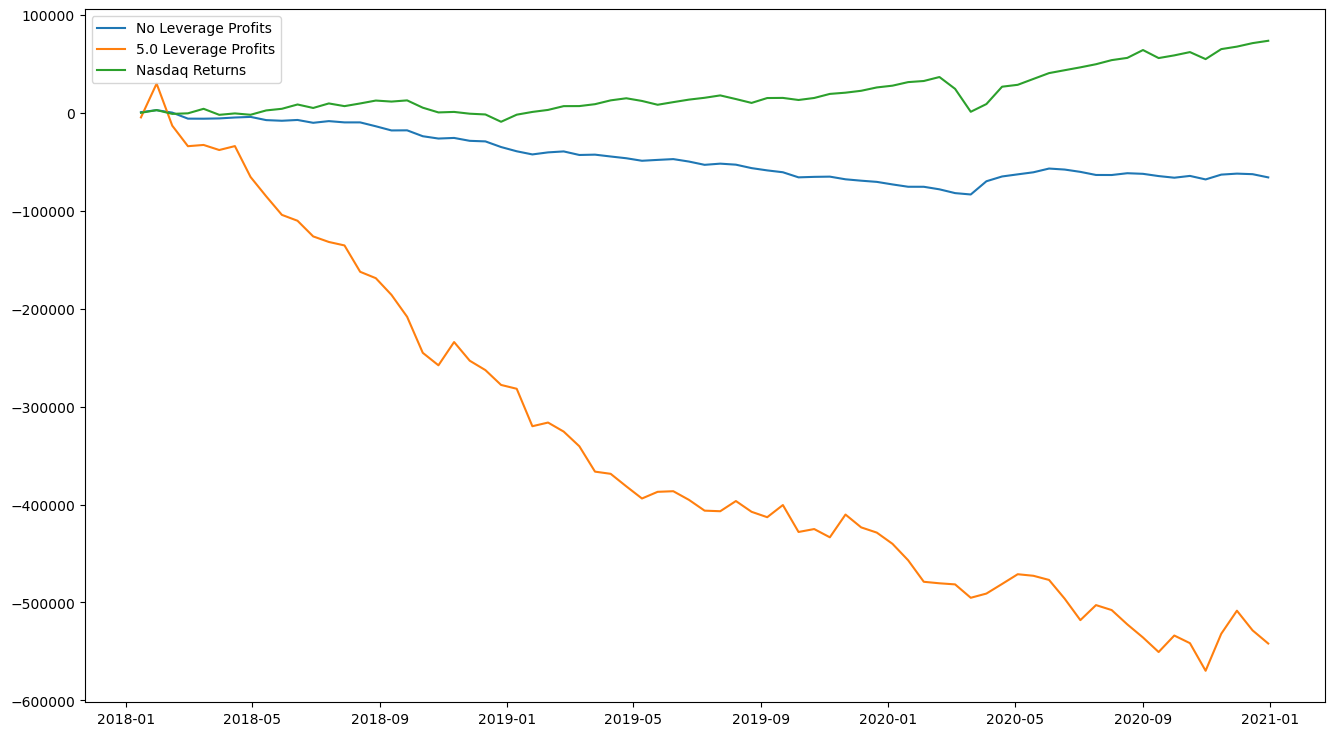

In [90]:
# Plot the backtest profits and the benchmark_data
plt.figure(figsize=(16, 9))
plt.plot(np.array(test_no_leverage['rebalance_periods'])[:, 1], np.cumsum(test_no_leverage['backtest_profits']), label='No Leverage Profits')
plt.plot(np.array(test_w_leverage['rebalance_periods'])[:, 1], np.cumsum(test_w_leverage['backtest_profits']), label='5.0 Leverage Profits')

plt.plot(np.array(test_no_leverage['rebalance_periods'])[:, 1], np.cumsum(benchmark_returns), label='Nasdaq Returns')
# Show labels
plt.legend()
# Show the plot
plt.show()